In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mapping.csv")

In [3]:
df['sequence'] = df.apply(lambda x: ''.join(x[1:9]), axis=1)

In [4]:
df

,Cultivar ID,vg0130976864,vg0135617816,vg0138428840,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Subpopulation,Plant Height (cm),sequence
0,C001,G,C,T,T,T,C,T,C,Indica I,144.13,GCTTTCTC
1,C002,G,C,C,T,T,C,C,C,VI/Aromatic,177.62,GCCTTCCC
2,C003,G,C,T,T,N,C,T,T,Japonica Intermediate,141.57,GCTTNCTT
3,C004,G,C,T,A,A,C,T,C,Temperate Japonica,140.40,GCTAACTC
4,C005,G,C,T,A,A,T,T,C,Tropical Japonica,163.33,GCTAATTC
...,...,...,...,...,...,...,...,...,...,...,...,...
524,W326,G,C,T,T,A,C,T,C,Japonica Intermediate,155.40,GCTTACTC
525,W327,A,C,T,T,A,C,T,C,Temperate Japonica,89.80,ACTTACTC
526,W328,A,C,T,T,A,C,T,T,Intermediate,117.40,ACTTACTT
527,W329,G,C,T,T,A,T,T,C,Tropical Japonica,147.40,GCTTATTC


In [9]:
df.to_csv("mapping.csv", index=False)

In [10]:
sequences = []
for i in range(df.shape[0]):
    sequences.append((df.iloc[i, 0], df.iloc[i, 11], df.iloc[i, 9]))

In [11]:
sequences

[('C001', 'GCTTTCTC', 'Indica I'),
 ('C002', 'GCCTTCCC', 'VI/Aromatic'),
 ('C003', 'GCTTNCTT', 'Japonica Intermediate'),
 ('C004', 'GCTAACTC', 'Temperate Japonica'),
 ('C005', 'GCTAATTC', 'Tropical Japonica'),
 ('C006', 'GCTTATTT', 'Indica Intermediate'),
 ('C007', 'GCTTATTT', 'Indica Intermediate'),
 ('C008', 'GCTTATTC', 'Indica Intermediate'),
 ('C009', 'GCTTATTT', 'Indica Intermediate'),
 ('C010', 'GCTTACTT', 'Tropical Japonica'),
 ('C011', 'GCTTATTT', 'Indica II'),
 ('C012', 'ACTAACTT', 'Temperate Japonica'),
 ('C013', 'GCCTTCTC', 'Aus'),
 ('C014', 'ACTTATTT', 'Japonica Intermediate'),
 ('C015', 'GCCTTCTC', 'Aus'),
 ('C016', 'GCTTACTT', 'Temperate Japonica'),
 ('C017', 'ACTTACTT', 'Temperate Japonica'),
 ('C018', 'ACTTACTT', 'Temperate Japonica'),
 ('C019', 'GCTTATTT', 'Indica I'),
 ('C020', 'GCTTATTT', 'Indica I'),
 ('C021', 'GCTTATTT', 'Indica I'),
 ('C022', 'GCTTATTT', 'Indica I'),
 ('C023', 'GCTTACTT', 'Temperate Japonica'),
 ('C024', 'ACTTATTT', 'Indica I'),
 ('C025', 'GCTTATT

In [14]:
filename = 'sequences.fasta'

# open the output file for writing
with open(filename, 'w') as f:

    # iterate over each sequence and write to the file in FASTA format
    for seq in sequences:
        cultivar_id, sequence, subpopulation  = seq
        subPop = "_".join(subpopulation.split())
        name = cultivar_id + "_" + subPop
        f.write(f'>{name}\n{sequence}\n')

In [15]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline

cline = ClustalwCommandline("clustalw2", infile = "sequences.fasta", outfile = "sequences.aln")
stderr, stdout = cline()

# Read in the FASTA file and perform a multiple sequence alignment
alignment = AlignIO.read("sequences.aln", "clustal")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the tree using the UPGMA
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(alignment)

# Visualize the tree
print(Phylo.draw_ascii(tree))


  __________ W128_Intermediate
 |
 |                                    , W320_Indica_Intermediate
 |                                    |
 |                                    | W272_Indica_Intermediate
 |                                    |
 |                                    | W235_Indica_I
 |                                    |
 |                                    | W126_Indica_I
 |                                    |
 |                                    | W124_Indica_I
 |                                    |
 |                                    | W039_Indica_I
 |                                    |
 |                                    | W036_Indica_I
 |                                    |
 |                                    | W032_Indica_I
 |                                    |
 |                                    | W031_Indica_I
 |                                    |
 |                                    | W026_Indica_I
 |                                    |
 |  

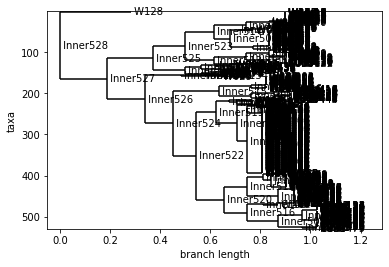

In [27]:
Phylo.draw(tree)